
# Objective
In this we need to predict house rents using data science methods, machine learning, and hyperparameter tuning.

# About Dataset

'Property_ID', = Unique id of the property

'room',  No. of rooms available

'layout_type',  ['BHK' 'RK']

'property_type', = ['Apartment' 'Studio Apartment' 'Independent Floor' 'Independent House' 'Villa' 'Penthouse']

'locality',  = Overall Locality description

'price', = Rent in INR

'area', = in Square Feet

'furnish_type', ['Semi-Furnished' 'Furnished' 'Unfurnished']

'bathroom',: No. of Bathrooms

'city', : ['Ahmedabad' 'Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Mumbai' 'Pune']

'parking_spaces',: 1 or 0  : 1 = Yes, 0 = No

'floor',: Floor from 0 to 20

'pet_friendly', : 1 or 0  : 1 = Yes, 0 = No

'power_backup', : 1 or 0  : 1 = Yes, 0 = No

'washing_machine',: 1 or 0  : 1 = Yes, 0 = No

'air_conditioner', : 1 or 0  : 1 = Yes, 0 = No

'geyser/solar',: 1 or 0  : 1 = Yes, 0 = No

'security_deposit', Amount of Security Deposit

'neighborhood', : Nearest Metro/Bus/Mall in meters

'CCTV/security : CCTV available 1 or 0  : 1 = Yes, 0 = No

'lift': 1 or 0  : 1 = Yes, 0 = No

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
pd.set_option('display.width',1000)
from warnings import filterwarnings
filterwarnings("ignore")
import scipy.stats as st
from sklearn.preprocessing import LabelEncoder
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

# import function for decision tree regression
import sklearn.tree as tree
from sklearn.tree import DecisionTreeRegressor

# import function for classification report & metrics
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

# import function for Random Forest regression
from sklearn.ensemble import RandomForestRegressor

# import function for AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

In [2]:
df = pd.read_csv('train_csv2022 (1).csv')

In [3]:
df.head()

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price
0,100361,4,BHK,Apartment,Sodepur,805,Furnished,2,Kolkata,1,3,0,0,0,1,0,33012,0,0,1500,4716
1,66785,2,BHK,Apartment,Geetanjali Enclave,1093,Furnished,2,Delhi,1,9,0,0,0,1,0,74907,1,1,300,24969
2,120243,2,RK,Independent Floor,Ghatkopar West,1227,Unfurnished,2,Mumbai,0,2,0,0,0,0,0,217314,1,0,1300,24146
3,96487,1,BHK,Apartment,New Town,1022,Furnished,3,Kolkata,0,8,1,0,0,1,0,217560,1,1,3600,36260
4,95695,2,BHK,Apartment,New Town,1403,Semi-Furnished,2,Kolkata,0,7,1,1,1,1,0,704624,1,1,200,176156


In [4]:
df.shape

(114480, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114480 entries, 0 to 114479
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Property_ID       114480 non-null  int64 
 1   room              114480 non-null  int64 
 2   layout_type       114480 non-null  object
 3   property_type     114480 non-null  object
 4   locality          114480 non-null  object
 5   area              114480 non-null  int64 
 6   furnish_type      114480 non-null  object
 7   bathroom          114480 non-null  int64 
 8   city              114480 non-null  object
 9   parking_spaces    114480 non-null  int64 
 10  floor             114480 non-null  int64 
 11  pet_friendly      114480 non-null  int64 
 12  power_backup      114480 non-null  int64 
 13  washing_machine   114480 non-null  int64 
 14  air_conditioner   114480 non-null  int64 
 15  geyser/solar      114480 non-null  int64 
 16  security_deposit  114480 non-null  int

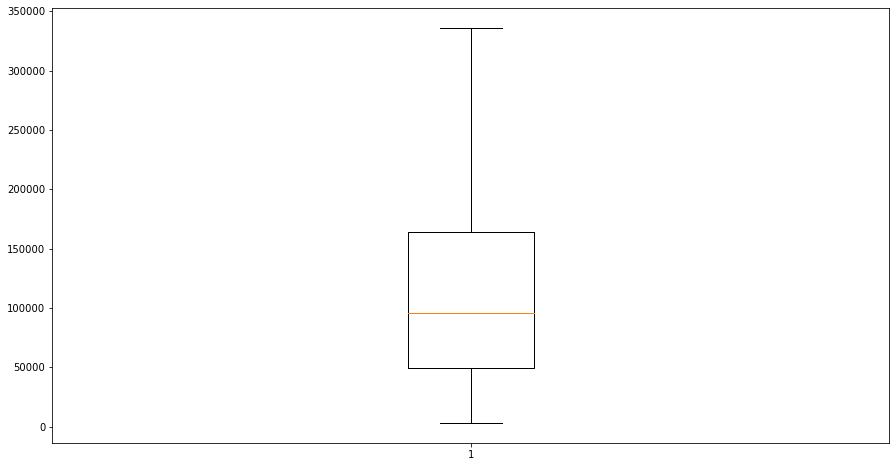

In [6]:
plt.figure(figsize=(15,8))
plt.ticklabel_format(style='plain')
plt.boxplot(df.security_deposit[df.security_deposit<336100]);

In [7]:
df.select_dtypes(np.number).columns

Index(['Property_ID', 'room', 'area', 'bathroom', 'parking_spaces', 'floor', 'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner', 'geyser/solar', 'security_deposit', 'CCTV/security', 'lift', 'neighbourhood', 'price'], dtype='object')

In [8]:
df.columns

Index(['Property_ID', 'room', 'layout_type', 'property_type', 'locality', 'area', 'furnish_type', 'bathroom', 'city', 'parking_spaces', 'floor', 'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner', 'geyser/solar', 'security_deposit', 'CCTV/security', 'lift', 'neighbourhood', 'price'], dtype='object')

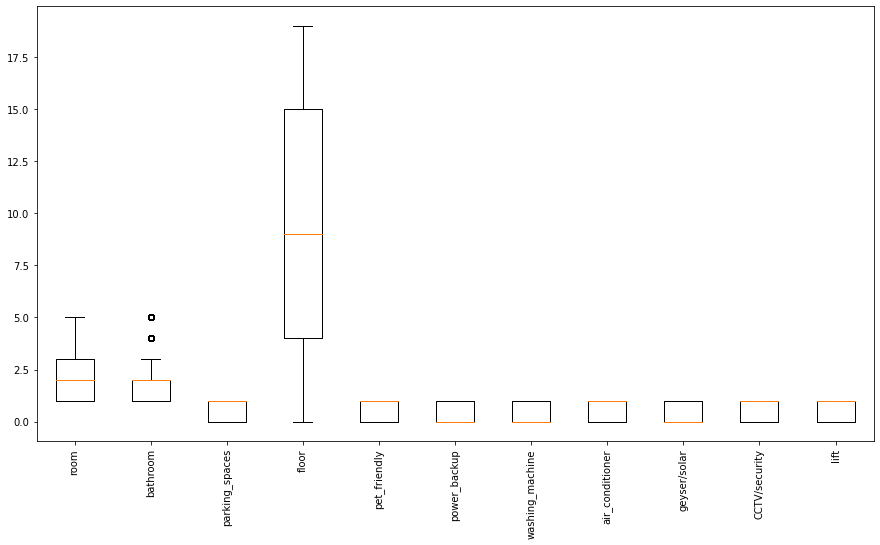

In [9]:
plt.figure(figsize=(15,8))
plt.boxplot(df[['room', 'bathroom', 'parking_spaces', 'floor', 'pet_friendly', 'power_backup', 'washing_machine',
   'air_conditioner', 'geyser/solar', 'CCTV/security', 'lift']]);
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11], labels= ['room', 'bathroom', 'parking_spaces', 'floor', 'pet_friendly', 'power_backup', 'washing_machine',
   'air_conditioner', 'geyser/solar', 'CCTV/security', 'lift'], rotation=90);

In [10]:
round(df.security_deposit.describe())

count     114480.0
mean      220144.0
std       420967.0
min         3180.0
25%        55708.0
50%       114075.0
75%       220082.0
max      7940780.0
Name: security_deposit, dtype: float64

In [11]:
out = df[['room', 'layout_type', 'property_type', 'locality', 'area', 
          'furnish_type', 'bathroom', 'city','security_deposit','price']][df.security_deposit>336100]

In [12]:
out.sort_values(by=['security_deposit'], axis=0 ,ascending=False).head(100)

,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,security_deposit,price
102379,1,BHK,Apartment,Kharadi,758,Furnished,2,Pune,7940780,794078
68548,3,RK,Apartment,Dombivli (West),923,Unfurnished,1,Mumbai,7795160,779516
21023,3,BHK,Apartment,Saket,698,Furnished,2,Delhi,7651500,765150
36644,3,RK,Apartment,Chattarpur,361,Semi-Furnished,2,Delhi,7569850,756985
104315,2,BHK,Apartment,Bhayandar East,1364,Unfurnished,1,Mumbai,7528670,752867
98097,2,RK,Independent Floor,Kasavanahalli,1122,Semi-Furnished,5,Bangalore,7517260,751726
69204,3,RK,Apartment,Chembur,2027,Semi-Furnished,3,Mumbai,7459050,745905
80191,1,BHK,Apartment,Bandra Kurla Complex,1316,Semi-Furnished,2,Mumbai,7425800,742580
76079,2,RK,Apartment,Madanayakahalli,2777,Unfurnished,2,Bangalore,7384670,738467
74069,1,BHK,Apartment,HSR Layout,1102,Semi-Furnished,2,Bangalore,7364560,736456


In [13]:
out1 = df[['room', 'layout_type', 'property_type', 'locality', 'area', 
          'furnish_type', 'bathroom', 'city','security_deposit','price']][df.bathroom>2.5]

In [14]:
out1.sort_values(by=['bathroom'], axis=0 ,ascending=False)

,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,security_deposit,price
61963,1,BHK,Apartment,Garhi,2392,Furnished,5,Delhi,16203,5401
34344,1,BHK,Independent Floor,Balewadi,771,Furnished,5,Pune,28250,14125
41649,1,RK,Independent House,Selaiyur,174,Unfurnished,5,Chennai,1000230,142890
60098,3,BHK,Apartment,Kharadi,385,Semi-Furnished,5,Pune,262650,26265
50552,3,BHK,Apartment,Madipakkam,1307,Semi-Furnished,5,Chennai,248388,62097
...,...,...,...,...,...,...,...,...,...,...
46646,3,RK,Independent Floor,Bellandur,792,Semi-Furnished,3,Bangalore,242100,40350
46635,5,BHK,Apartment,Sholinganallur,577,Furnished,3,Chennai,193312,24164
46625,3,RK,Independent House,Andheri East,1192,Unfurnished,3,Mumbai,101136,16856
46620,3,BHK,Independent Floor,Ulwe,243,Semi-Furnished,3,Mumbai,79536,19884


In [15]:
hr_df= df.copy()

In [16]:
hr_df.columns

Index(['Property_ID', 'room', 'layout_type', 'property_type', 'locality', 'area', 'furnish_type', 'bathroom', 'city', 'parking_spaces', 'floor', 'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner', 'geyser/solar', 'security_deposit', 'CCTV/security', 'lift', 'neighbourhood', 'price'], dtype='object')

In [17]:
count = hr_df[[ 'room', 'layout_type', 'property_type',"locality", 'furnish_type', 'bathroom', 
               'city', 'parking_spaces', 'floor', 'pet_friendly', 'power_backup', 'washing_machine', 
               'air_conditioner', 'geyser/solar', 'CCTV/security', 'lift']]

In [18]:
for i in count.columns:
    print(i)
    print(hr_df[i].value_counts().sort_values(ascending=False))
    print()

room
1    40845
2    36676
3    30682
4     5474
5      803
Name: room, dtype: int64

layout_type
BHK    97415
RK     17065
Name: layout_type, dtype: int64

property_type
Apartment            73773
Independent Floor    21925
Independent House    11446
Studio Apartment      4889
Villa                 2028
Penthouse              419
Name: property_type, dtype: int64

locality
Thane West             2699
Chembur                2069
Andheri East           1996
Bopal                  1714
Kharghar               1538
                       ... 
Rajas Society             1
Gundlapochampalli         1
Adraj                     1
Kharghar Sector 34C       1
Parui Mauza               1
Name: locality, Length: 3512, dtype: int64

furnish_type
Semi-Furnished    54103
Unfurnished       35217
Furnished         25160
Name: furnish_type, dtype: int64

bathroom
2    60993
1    29375
3    15698
4     6905
5     1509
Name: bathroom, dtype: int64

city
Mumbai       39873
Delhi        19402
Bangalore    13

In [19]:
hr_df.drop(['Property_ID','locality'],axis=1,inplace=True)

In [20]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114480 entries, 0 to 114479
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   room              114480 non-null  int64 
 1   layout_type       114480 non-null  object
 2   property_type     114480 non-null  object
 3   area              114480 non-null  int64 
 4   furnish_type      114480 non-null  object
 5   bathroom          114480 non-null  int64 
 6   city              114480 non-null  object
 7   parking_spaces    114480 non-null  int64 
 8   floor             114480 non-null  int64 
 9   pet_friendly      114480 non-null  int64 
 10  power_backup      114480 non-null  int64 
 11  washing_machine   114480 non-null  int64 
 12  air_conditioner   114480 non-null  int64 
 13  geyser/solar      114480 non-null  int64 
 14  security_deposit  114480 non-null  int64 
 15  CCTV/security     114480 non-null  int64 
 16  lift              114480 non-null  int

In [21]:
hr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
room,114480.0,2.027900,0.937242,1.0,1.00,2.0,3.0,5.0
area,114480.0,1480.984294,1414.956838,81.0,758.00,1113.5,1581.0,13942.0
bathroom,114480.0,2.040706,0.867160,1.0,1.00,2.0,2.0,5.0
parking_spaces,114480.0,0.535098,0.498769,0.0,0.00,1.0,1.0,1.0
floor,114480.0,9.161251,5.961633,0.0,4.00,9.0,15.0,19.0
pet_friendly,114480.0,0.527420,0.499250,0.0,0.00,1.0,1.0,1.0
power_backup,114480.0,0.336408,0.472482,0.0,0.00,0.0,1.0,1.0
washing_machine,114480.0,0.472598,0.499251,0.0,0.00,0.0,1.0,1.0
air_conditioner,114480.0,0.692374,0.461513,0.0,0.00,1.0,1.0,1.0
geyser/solar,114480.0,0.441282,0.496542,0.0,0.00,0.0,1.0,1.0


In [22]:
hr_df[hr_df.area>10000].sort_values(by=['area'], axis=0 ,ascending=False).head(10)

,room,layout_type,property_type,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price
47949,2,BHK,Apartment,13942,Semi-Furnished,2,Bangalore,0,3,0,0,1,1,1,223232,1,0,1900,27904
13584,1,BHK,Apartment,13735,Furnished,2,Chennai,0,18,0,1,0,1,1,19368,1,1,2000,6456
42024,2,BHK,Apartment,13363,Semi-Furnished,2,Hyderabad,1,1,1,0,1,1,1,199584,1,0,3100,24948
43940,2,BHK,Apartment,13198,Furnished,3,Hyderabad,1,15,1,0,0,1,1,166212,1,1,1600,27702
100893,1,RK,Independent House,13079,Unfurnished,2,Delhi,1,16,1,0,0,0,0,205416,1,1,3700,25677
6896,2,RK,Apartment,12981,Furnished,2,Delhi,0,5,0,0,0,1,0,83860,0,0,3200,11980
105809,4,BHK,Apartment,12925,Semi-Furnished,2,Bangalore,1,19,0,1,1,1,0,1118168,1,1,1500,139771
67363,1,BHK,Apartment,12887,Semi-Furnished,3,Ahmedabad,1,18,0,0,1,1,1,262773,1,1,2000,37539
11305,2,BHK,Apartment,12811,Furnished,2,Chennai,1,12,0,1,0,1,1,58617,1,1,1700,6513
89914,1,BHK,Apartment,12796,Semi-Furnished,1,Delhi,1,10,0,0,1,1,1,34346,0,1,1300,17173


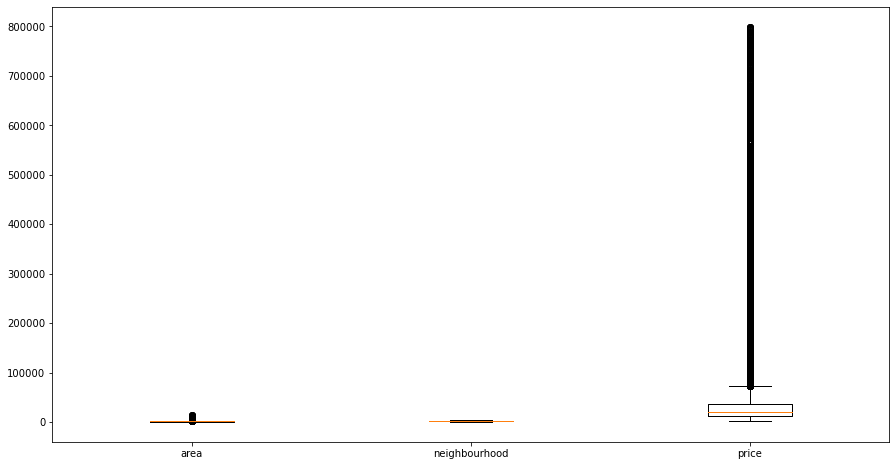

In [23]:
plt.figure(figsize=(15,8))
plt.boxplot(hr_df[["area","neighbourhood","price"]]);
plt.xticks(ticks=[1,2,3], labels=["area","neighbourhood","price"]);

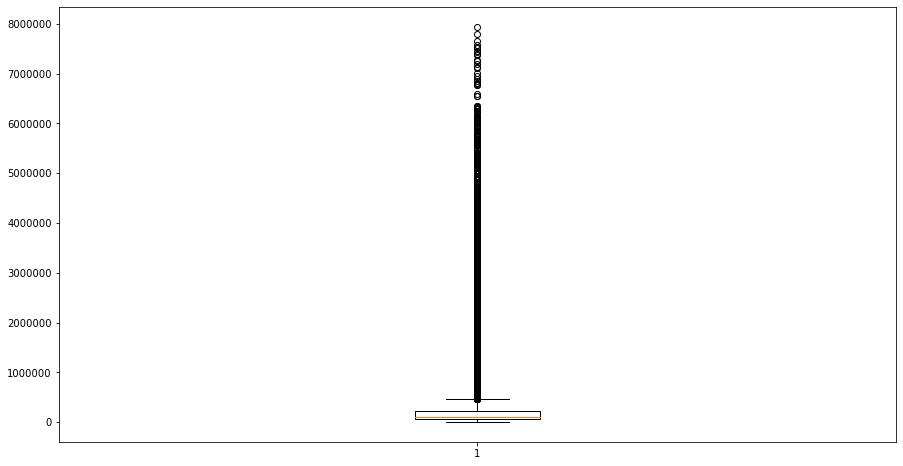

In [420]:
plt.figure(figsize=(15,8))
plt.ticklabel_format(style='plain')
plt.boxplot(df.security_deposit);

# Feature Engineering

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
hr_df['property_type']=le.fit_transform(hr_df['property_type'])
hr_df.head(10)

,room,layout_type,property_type,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price
0,4,BHK,0,805,Furnished,2,Kolkata,1,3,0,0,0,1,0,33012,0,0,1500,4716
1,2,BHK,0,1093,Furnished,2,Delhi,1,9,0,0,0,1,0,74907,1,1,300,24969
2,2,RK,1,1227,Unfurnished,2,Mumbai,0,2,0,0,0,0,0,217314,1,0,1300,24146
3,1,BHK,0,1022,Furnished,3,Kolkata,0,8,1,0,0,1,0,217560,1,1,3600,36260
4,2,BHK,0,1403,Semi-Furnished,2,Kolkata,0,7,1,1,1,1,0,704624,1,1,200,176156
5,4,BHK,1,744,Unfurnished,1,Mumbai,0,11,0,0,0,0,0,30160,0,1,900,3770
6,1,BHK,0,1005,Unfurnished,1,Mumbai,0,4,1,0,0,0,1,163904,1,0,3100,40976
7,1,BHK,0,906,Semi-Furnished,3,Mumbai,0,0,1,1,1,1,0,32264,0,0,200,16132
8,1,BHK,2,724,Furnished,1,Mumbai,0,3,0,0,0,1,0,73648,0,0,0,18412
9,3,BHK,2,2073,Semi-Furnished,3,Ahmedabad,1,13,0,0,1,1,0,120051,0,1,1500,13339


In [26]:
hr_df['city']=le.fit_transform(hr_df['city'])
hr_df.head(10)

,room,layout_type,property_type,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price
0,4,BHK,0,805,Furnished,2,5,1,3,0,0,0,1,0,33012,0,0,1500,4716
1,2,BHK,0,1093,Furnished,2,3,1,9,0,0,0,1,0,74907,1,1,300,24969
2,2,RK,1,1227,Unfurnished,2,6,0,2,0,0,0,0,0,217314,1,0,1300,24146
3,1,BHK,0,1022,Furnished,3,5,0,8,1,0,0,1,0,217560,1,1,3600,36260
4,2,BHK,0,1403,Semi-Furnished,2,5,0,7,1,1,1,1,0,704624,1,1,200,176156
5,4,BHK,1,744,Unfurnished,1,6,0,11,0,0,0,0,0,30160,0,1,900,3770
6,1,BHK,0,1005,Unfurnished,1,6,0,4,1,0,0,0,1,163904,1,0,3100,40976
7,1,BHK,0,906,Semi-Furnished,3,6,0,0,1,1,1,1,0,32264,0,0,200,16132
8,1,BHK,2,724,Furnished,1,6,0,3,0,0,0,1,0,73648,0,0,0,18412
9,3,BHK,2,2073,Semi-Furnished,3,0,1,13,0,0,1,1,0,120051,0,1,1500,13339


In [27]:
hr_df.furnish_type.replace(['Furnished', 'Unfurnished', 'Semi-Furnished'],[2,0,1],inplace=True)

In [28]:
hr_df.layout_type= pd.get_dummies(hr_df.layout_type, drop_first=True)
hr_df.head(10)

,room,layout_type,property_type,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price
0,4,0,0,805,2,2,5,1,3,0,0,0,1,0,33012,0,0,1500,4716
1,2,0,0,1093,2,2,3,1,9,0,0,0,1,0,74907,1,1,300,24969
2,2,1,1,1227,0,2,6,0,2,0,0,0,0,0,217314,1,0,1300,24146
3,1,0,0,1022,2,3,5,0,8,1,0,0,1,0,217560,1,1,3600,36260
4,2,0,0,1403,1,2,5,0,7,1,1,1,1,0,704624,1,1,200,176156
5,4,0,1,744,0,1,6,0,11,0,0,0,0,0,30160,0,1,900,3770
6,1,0,0,1005,0,1,6,0,4,1,0,0,0,1,163904,1,0,3100,40976
7,1,0,0,906,1,3,6,0,0,1,1,1,1,0,32264,0,0,200,16132
8,1,0,2,724,2,1,6,0,3,0,0,0,1,0,73648,0,0,0,18412
9,3,0,2,2073,1,3,0,1,13,0,0,1,1,0,120051,0,1,1500,13339


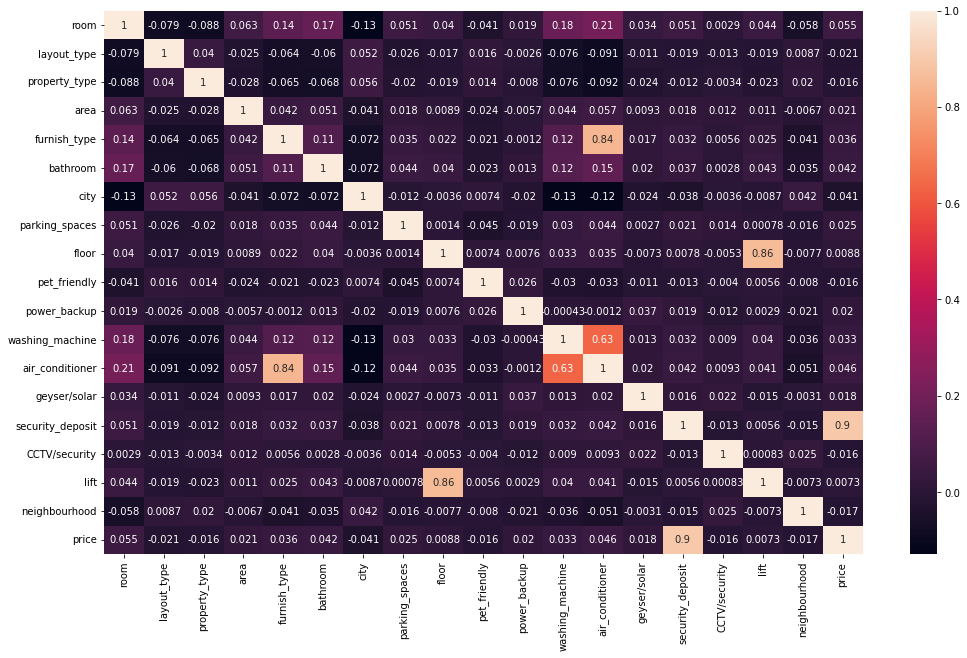

In [29]:
plt.figure(figsize=(17,10))
sns.heatmap(hr_df.corr(),annot= True);

'''Heatmap showes correlation between:
1. Price(target) & security deposit  --- > if price is high then it security amount is also high
2. lift & Floor  ---> if building have many floor then the prob. of lift is also high
3. air_conditioner & furnish_type   --->   mostly in furnished house, air_conditioner prob. is higher then others
4. air_conditioner & Washing_Machine ---> if builder provide air_conditoner then it can be possible washing_machine be there''' 

In [30]:
# correlation test
y = hr_df.price
x1_num = hr_df[["area","security_deposit","neighbourhood"]]

In [31]:
for i in x1_num.columns:
    sta,p_val = st.pearsonr(x1_num[i],y)
    if p_val>0.05:
        print(i,round(p_val,2),"has no effect with Price")
    else:
        print(i,round(p_val,2),"has clear effect with Price")

area 0.0 has clear effect with Price
security_deposit 0.0 has clear effect with Price
neighbourhood 0.0 has clear effect with Price


In [32]:
# t test cat
hr_df.columns

Index(['room', 'layout_type', 'property_type', 'area', 'furnish_type', 'bathroom', 'city', 'parking_spaces', 'floor', 'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner', 'geyser/solar', 'security_deposit', 'CCTV/security', 'lift', 'neighbourhood', 'price'], dtype='object')

In [ ]:
for i in X.columns:
    xf =df[df["target"] == 0][i]
    xt = hr_df[hr_df[i] == 1]["price"]
    sta,p_val = st.ttest_ind(xf, xt)
    if p_val>0.05:
        print(i,round(p_val,2),"has no effect with Price\n")
    else:
        print(i,round(p_val,2),"has clear effect with Price\n")

In [33]:
x2_cat = hr_df[["layout_type", 'parking_spaces', 'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner',
                'geyser/solar', 'CCTV/security', 'lift']]
for i in x2_cat.columns:
    xf =hr_df[hr_df[i] == 0]["price"]
    xt = hr_df[hr_df[i] == 1]["price"]
    sta,p_val = st.ttest_ind(xf, xt)
    if p_val>0.05:
        print(i,round(p_val,2),"has no effect with Price\n")
    else:
        print(i,round(p_val,2),"has clear effect with Price\n")

layout_type 0.0 has clear effect with Price

parking_spaces 0.0 has clear effect with Price

pet_friendly 0.0 has clear effect with Price

power_backup 0.0 has clear effect with Price

washing_machine 0.0 has clear effect with Price

air_conditioner 0.0 has clear effect with Price

geyser/solar 0.0 has clear effect with Price

CCTV/security 0.0 has clear effect with Price

lift 0.01 has clear effect with Price



In [34]:
# anova test
x3_cat = hr_df[["property_type","furnish_type","city","floor"]]

In [35]:
for i in x3_cat.columns:
    m1= ols('price~{}'.format(i), data=hr_df).fit()
    anova_table = anova_lm(m1)
    p_val = anova_table.values[0][-1]
    if p_val>0.05:
        print(i,round(p_val,2),"has no effect with Price\n")
    else:
        print(i,round(p_val,2),"has clear effect with Price\n")

property_type 0.0 has clear effect with Price

furnish_type 0.0 has clear effect with Price

city 0.0 has clear effect with Price

floor 0.0 has clear effect with Price



# visualization

In [36]:
y = hr_df.price
x_num = hr_df[['area','security_deposit','neighbourhood', 'price']]
x_cat = hr_df[['room', 'layout_type', 'property_type',  'furnish_type', 'bathroom', 'city', 'parking_spaces', 'floor',
         'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner', 'geyser/solar','CCTV/security', 'lift' ]]

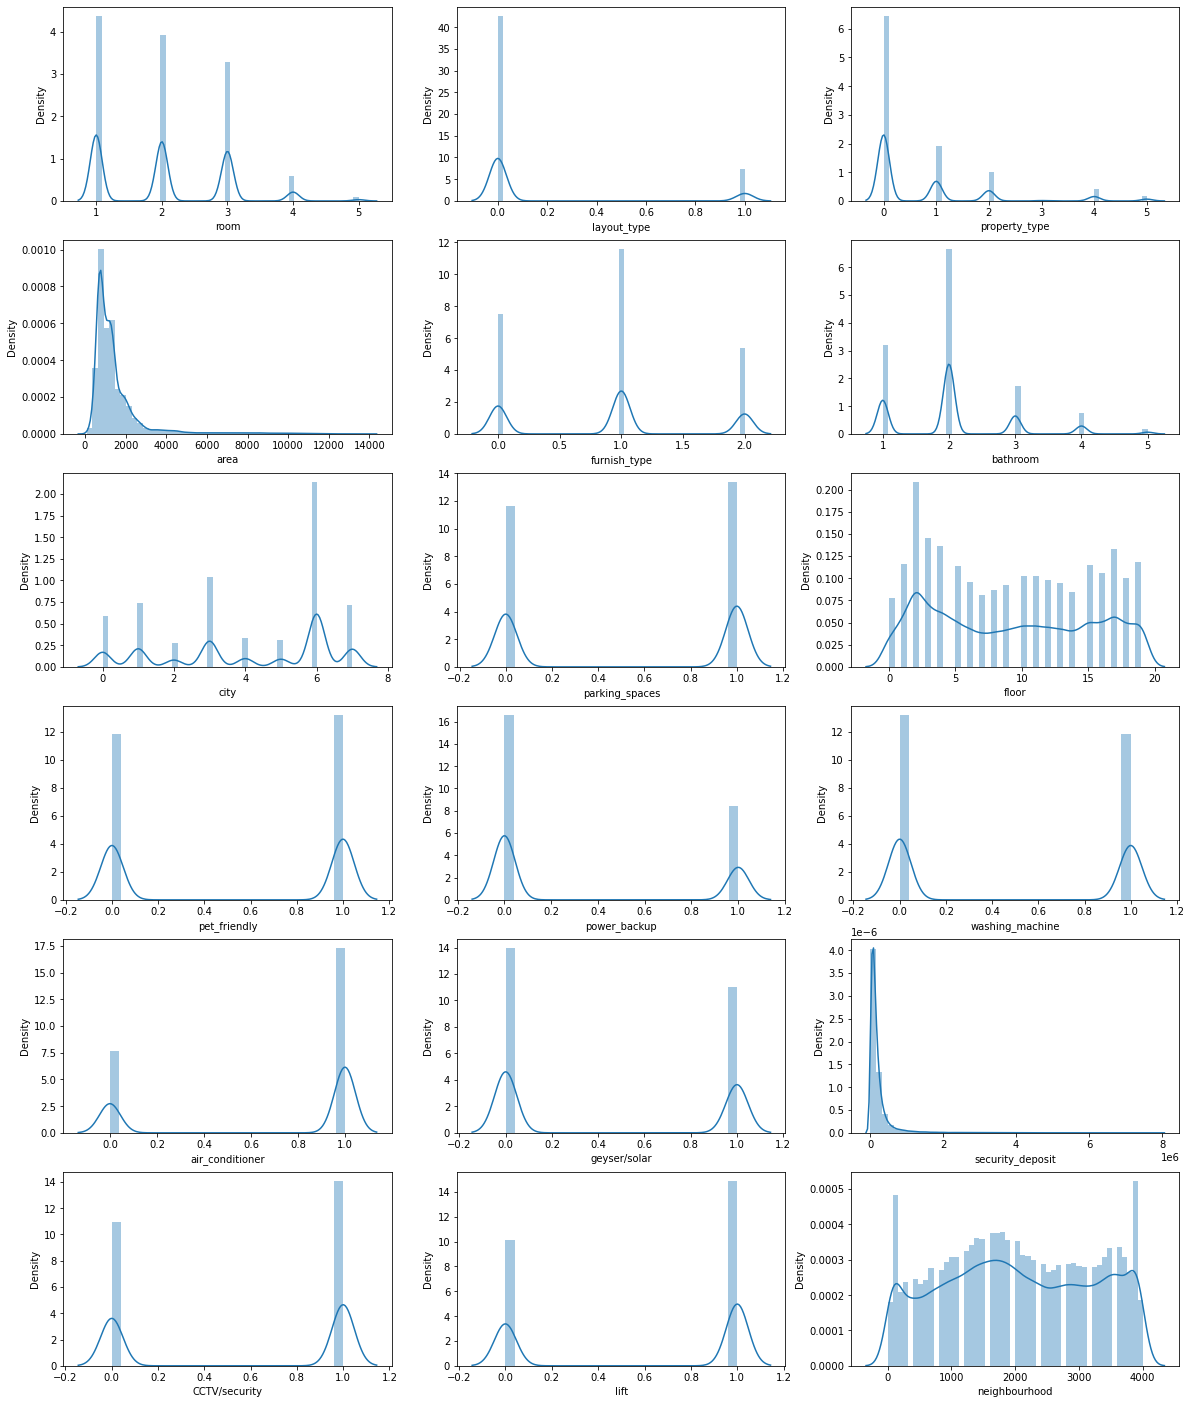

In [37]:
fig, ax= plt.subplots(6,3, figsize=(20,25))
for var, subplot in zip(hr_df.columns, ax.flatten()):
    sns.distplot(hr_df[var], ax=subplot)
plt.show()

categories present in room->


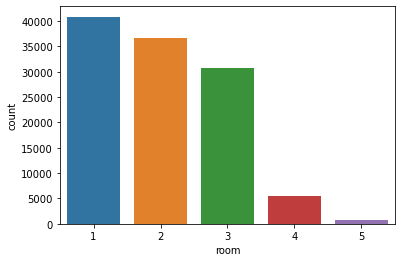

categories present in layout_type->


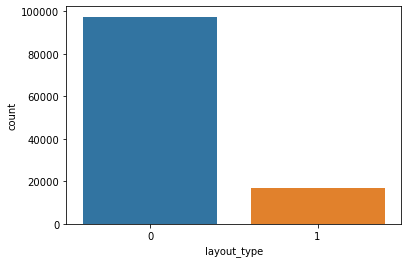

categories present in property_type->


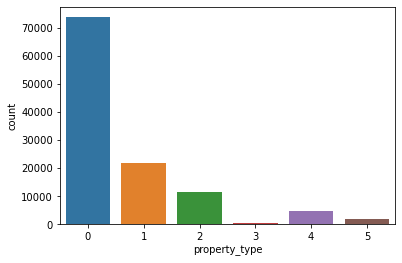

categories present in furnish_type->


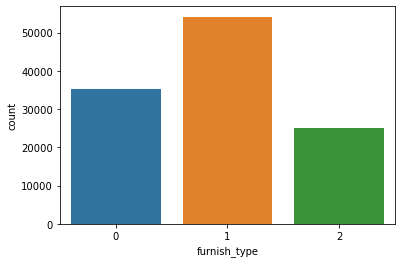

categories present in bathroom->


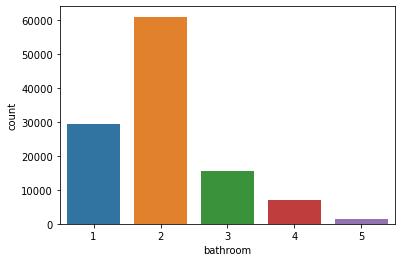

categories present in city->


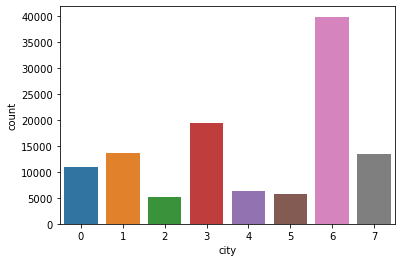

categories present in parking_spaces->


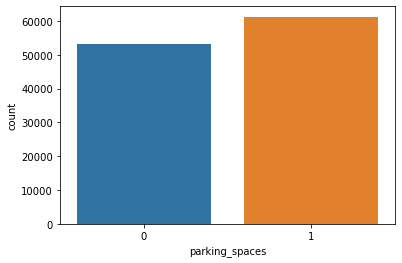

categories present in floor->


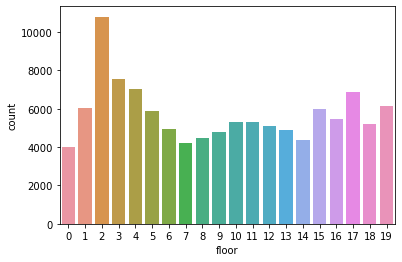

categories present in pet_friendly->


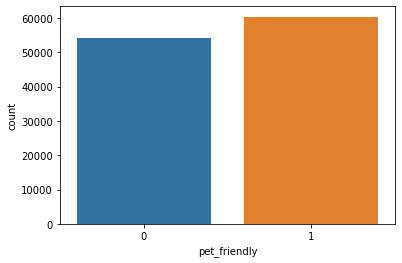

categories present in power_backup->


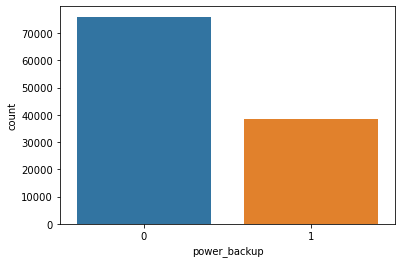

categories present in washing_machine->


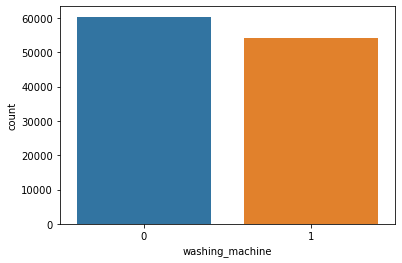

categories present in air_conditioner->


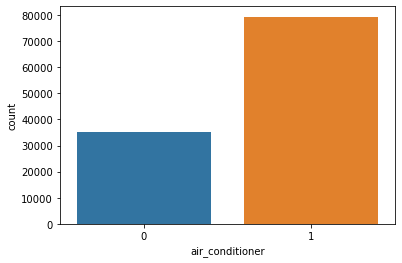

categories present in geyser/solar->


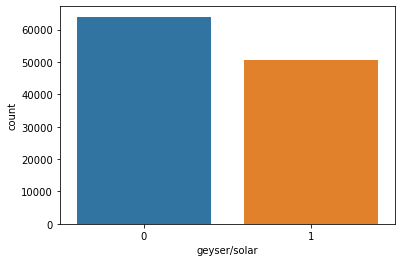

categories present in CCTV/security->


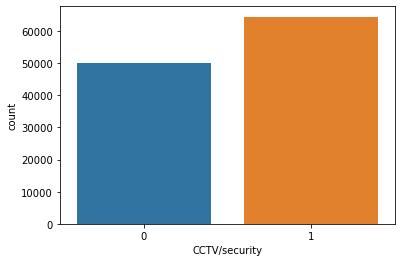

categories present in lift->


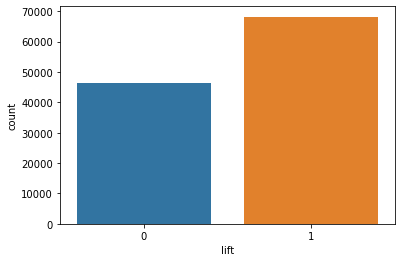

In [38]:
for i in x_cat.columns:
    print("categories present in {}->".format(i))
    sns.countplot(x_cat[i])
    plt.show()

categories present in room->


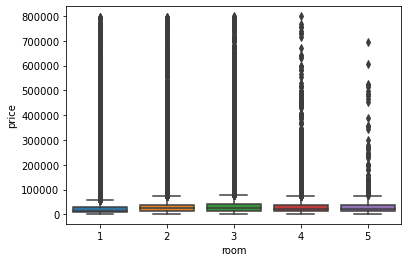

categories present in layout_type->


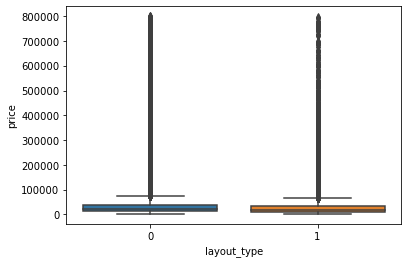

categories present in property_type->


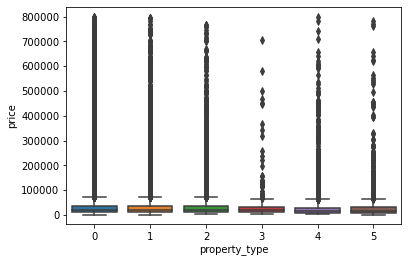

categories present in furnish_type->


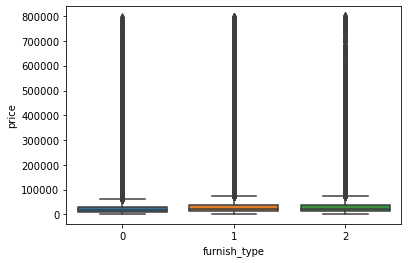

categories present in bathroom->


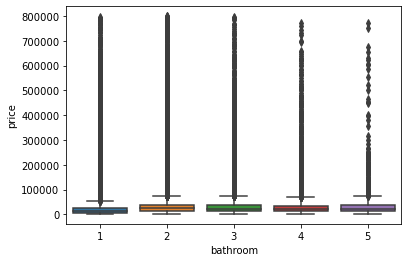

categories present in city->


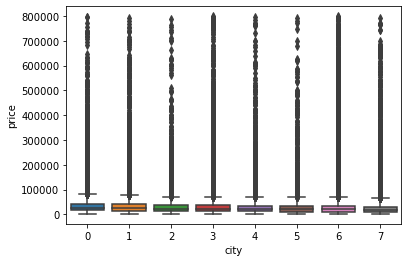

categories present in parking_spaces->


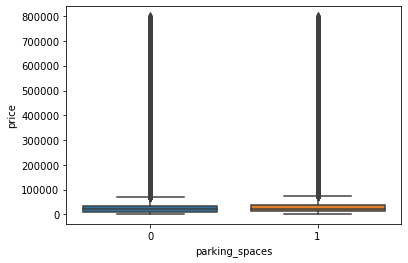

categories present in floor->


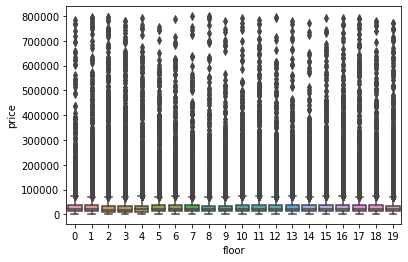

categories present in pet_friendly->


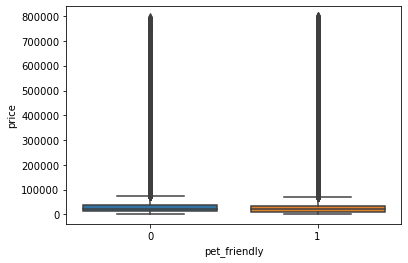

categories present in power_backup->


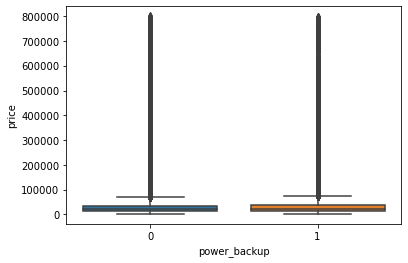

categories present in washing_machine->


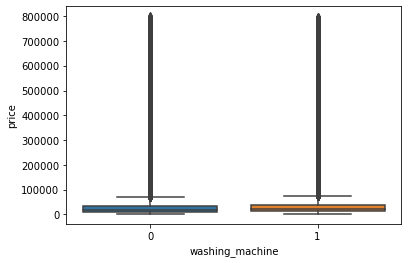

categories present in air_conditioner->


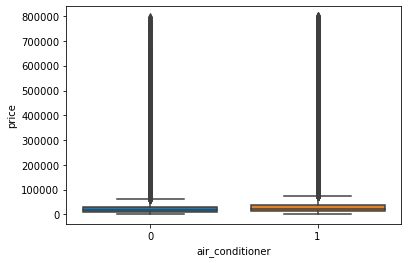

categories present in geyser/solar->


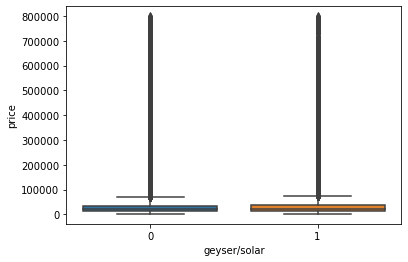

categories present in CCTV/security->


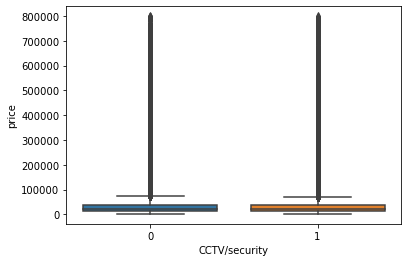

categories present in lift->


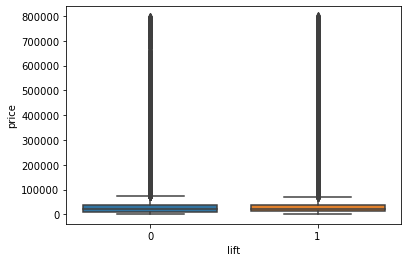

In [39]:
for i in x_cat.columns:
    print("categories present in {}->".format(i))
    sns.boxplot(x_cat[i],y)
    plt.show()

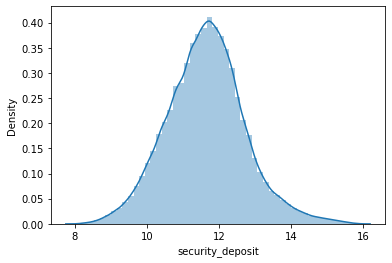

In [40]:
sns.distplot(np.log(hr_df["security_deposit"]));

In [41]:
print(st.skew(hr_df["security_deposit"]))
st.skew(np.log(hr_df["security_deposit"]))

7.096210353678909


0.20067912811923724

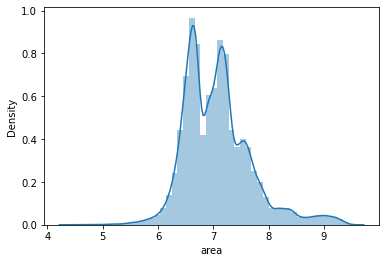

In [42]:
sns.distplot(np.log(hr_df["area"]));

In [43]:
print(st.skew(hr_df["area"]))
st.skew(np.log(hr_df["area"]))

3.874311466488042


0.9256878871020657

# train test split

In [454]:
from sklearn.model_selection import train_test_split
x  =  hr_df.drop(["price"],axis=1)
y = hr_df.price

In [455]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(91584, 18)
(22896, 18)
(91584,)
(22896,)


In [456]:
y_train1 = y_train
x_train1 = x_train
x_test1 = x_test
y_test1 = y_test

# base model

In [457]:
import statsmodels.api as sm

In [458]:
x_train1["security_deposit"] = np.log(x_train1["security_deposit"])
x_train1["area"] = np.log(x_train1["area"])
y_train1 = np.log(y_train1)

In [459]:
lin_mod= sm.OLS(y_train1,x_train1).fit()
lin_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          2.705e+06
Date:                Tue, 06 Dec 2022   Prob (F-statistic):                        0.00
Time:                        00:18:08   Log-Likelihood:                         -56042.
No. Observations:               91584   AIC:                                  1.121e+05
Df Residuals:                   91567   BIC:                                  1.123e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
room                 0.0240      0.002     14.445      0.000       0.021       0.027
layout_type         -0.0091      0.004     -2.192      0.028      -0.017      -0.001
property_type       -0.0015      0.001     -1.194      0.233      -0.004       0.001
area                 0.0773      0.002     42.573      0.000       0.074       0.081
furnish_type         0.0136      0.002      7.332      0.000       0.010       0.017
bathroom             0.0226      0.002     12.886      0.000       0.019       0.026
city                -0.0029      0.001     -4.528      0.000      -0.004      -0.002
parking_spaces       0.0179      0.003      6.043      0.000       0.012       0.024
floor                0.0011      0.000      2.329      0.020       0.000       0.002
pet_friendly        -0.0042      0.003     -1.430      0.153      -0.010       0.002
power_backup         0.0141      0.003      4.502      0.000       0.008       0.020
washing_machine      0.0199      0.003      7.674      0.000       0.015       0.025
air_conditioner      0.0168      0.001     13.996      0.000       0.014       0.019
geyser/solar         0.0109      0.003      3.674      0.000       0.005       0.017
security_deposit     0.7970      0.001    726.448      0.000       0.795       0.799
CCTV/security     9.002e-05      0.003      0.030      0.976      -0.006       0.006
lift                -0.0037      0.006     -0.632      0.527      -0.015       0.008
neighbourhood    -1.031e-06   1.26e-06     -0.816      0.414   -3.51e-06    1.44e-06
==============================================================================
Omnibus:                     4829.309   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4460.682
Skew:                           0.483   Prob(JB):                         0.00
Kurtosis:                       2.514   Cond. No.                     1.46e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.36e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [460]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

In [461]:
x_test1["security_deposit"] = np.log(x_test1["security_deposit"])
x_test1["area"] = np.log(x_test1["area"])

In [462]:
y_pred_train= lin_mod.predict(x_train1)
y_pred_test = lin_mod.predict(x_test1)

In [463]:
np.exp(y_pred_test)

29803       7980.703924
52339      17835.253543
64566     194620.724008
106741     17716.194015
74458     113353.018179
              ...      
98414      14571.527554
94442      86139.723572
6031       48467.663046
79223      11933.589306
102872     21526.238451
Length: 22896, dtype: float64

In [464]:
mean_squared_error(y_train, np.exp(y_pred_train), squared=False)

32094.805969071578

In [466]:
mean_squared_error(y_test, np.exp(y_pred_test), squared=False)

31388.22177947464

# VIF model

In [185]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# create a column of variable names
vif["Features"] = x.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,inf,air_conditioner
1,inf,furnish_type
2,inf,washing_machine
3,12.159909,floor
4,9.216456,lift
5,5.938406,bathroom
6,5.455373,room
7,3.569479,neighbourhood
8,3.505453,city
9,2.198676,CCTV/security


In [186]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'
x_vif = x.copy()

# use for loop to iterate the VIF function 
for ind in range(len(x_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(x_vif.values, i) for i in range(x_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = x_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        x_vif = x_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor          Features
0     5.428486              room
1     1.172816       layout_type
2     1.320152     property_type
3     2.055437              area
4     5.902548          bathroom
5     3.477049              city
6     2.095827    parking_spaces
7     2.005335      pet_friendly
8     1.485359      power_backup
9     3.177177   washing_machine
10    5.395619   air_conditioner
11    1.754689      geyser/solar
12    1.274207  security_deposit
13    2.197329     CCTV/security
14    2.384771              lift
15    3.553672     neighbourhood


In [187]:
# set of independent variables
# create a copy of 'df_reimb_dummy' and store in the dataframe 'X_vif'
x_vif_act = x_vif.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_vif'
y_vif = y.copy()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
x_train_vif, x_test_vif, y_train_vif, y_test_vif = train_test_split(x_vif, y_vif, random_state=1, test_size = 0.2)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_vif :', x_train_vif.shape)
print('y_train_vif :', y_train_vif.shape)

# print dimension of test set
print('X_test_vif  :', x_test_vif.shape)
print('y_test_vif  :', y_test_vif.shape)

X_train_vif : (91584, 16)
y_train_vif : (91584,)
X_test_vif  : (22896, 16)
y_test_vif  : (22896,)


In [188]:
y_train_vif1 = y_train_vif
x_train_vif1 = x_train_vif
x_test_vif1 = x_test_vif
y_test_vif1 = y_test_vif

In [189]:
x_train_vif1["security_deposit"] = np.log(x_train_vif1["security_deposit"])
x_train_vif1["area"] = np.log(x_train_vif1["area"])
y_train_vif1 = np.log(y_train_vif1)

In [190]:
vif_mod= sm.OLS(y_train_vif1,x_train_vif1).fit()
vif_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          2.874e+06
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                        0.00
Time:                        14:12:42   Log-Likelihood:                         -56045.
No. Observations:               91584   AIC:                                  1.121e+05
Df Residuals:                   91568   BIC:                                  1.123e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
room                 0.0240      0.002     14.452      0.000       0.021       0.027
layout_type         -0.0091      0.004     -2.181      0.029      -0.017      -0.001
property_type       -0.0015      0.001     -1.180      0.238      -0.004       0.001
area                 0.0775      0.002     42.734      0.000       0.074       0.081
bathroom             0.0226      0.002     12.904      0.000       0.019       0.026
city                -0.0028      0.001     -4.479      0.000      -0.004      -0.002
parking_spaces       0.0180      0.003      6.053      0.000       0.012       0.024
pet_friendly        -0.0041      0.003     -1.403      0.161      -0.010       0.002
power_backup         0.0142      0.003      4.542      0.000       0.008       0.020
washing_machine      0.0063      0.004      1.656      0.098      -0.001       0.014
air_conditioner      0.0439      0.004     10.469      0.000       0.036       0.052
geyser/solar         0.0110      0.003      3.698      0.000       0.005       0.017
security_deposit     0.7972      0.001    727.428      0.000       0.795       0.799
CCTV/security     4.626e-05      0.003      0.016      0.988      -0.006       0.006
lift                 0.0079      0.003      2.629      0.009       0.002       0.014
neighbourhood    -1.008e-06   1.26e-06     -0.798      0.425   -3.48e-06    1.47e-06
==============================================================================
Omnibus:                     4834.854   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4462.601
Skew:                           0.483   Prob(JB):                         0.00
Kurtosis:                       2.514   Cond. No.                     8.08e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
x_test_vif1["security_deposit"] = np.log(x_test_vif1["security_deposit"])
x_test_vif1["area"] = np.log(x_test_vif1["area"])

In [198]:
vif_y_pred_train= vif_mod.predict(x_train_vif1)
vif_y_pred_test= vif_mod.predict(x_test_vif1)

In [199]:
print("RMSE of train:\n",mean_squared_error(y_train_vif, np.exp(vif_y_pred_train), squared=False),"\n")
print("RMSE of test:\n",mean_squared_error(y_test_vif, np.exp(vif_y_pred_test), squared=False))

RMSE of train:
 32089.554545684263 

RMSE of test:
 31382.124225977615


# sig_model

In [207]:
x_train2 = x_train[['room', 'layout_type', 'property_type', 'area', 'furnish_type', 'bathroom',
                   'city', 'parking_spaces', 'floor', 'pet_friendly', 'power_backup', 'washing_machine',
                   'air_conditioner', 'geyser/solar', 'security_deposit', 'neighbourhood']]
y_train2 = y_train

In [208]:
x_train2["security_deposit"] = np.log(x_train2["security_deposit"])
x_train2["area"] = np.log(x_train2["area"])
y_train2 = np.log(y_train2)

In [209]:
sig_mod= sm.OLS(y_train2,x_train2).fit()
sig_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          1.821e+06
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                        0.00
Time:                        14:21:36   Log-Likelihood:                         -79845.
No. Observations:               91584   AIC:                                  1.597e+05
Df Residuals:                   91569   BIC:                                  1.599e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
room                 0.0542      0.002     25.270      0.000       0.050       0.058
layout_type         -0.0877      0.005    -16.213      0.000      -0.098      -0.077
property_type       -0.0256      0.002    -15.187      0.000      -0.029      -0.022
area                -2.5193      0.018   -138.795      0.000      -2.555      -2.484
furnish_type         0.0252      0.002     10.473      0.000       0.020       0.030
bathroom             0.0309      0.002     13.581      0.000       0.026       0.035
city                -0.0307      0.001    -37.118      0.000      -0.032      -0.029
parking_spaces       0.0229      0.004      5.950      0.000       0.015       0.030
floor               -0.0012      0.000     -3.620      0.000      -0.002      -0.001
pet_friendly        -0.0645      0.004    -16.822      0.000      -0.072      -0.057
power_backup         0.0008      0.004      0.206      0.837      -0.007       0.009
washing_machine      0.0650      0.003     19.330      0.000       0.058       0.072
air_conditioner      0.0451      0.002     29.125      0.000       0.042       0.048
geyser/solar         0.0058      0.004      1.496      0.135      -0.002       0.013
security_deposit     6.0727      0.015    416.527      0.000       6.044       6.101
neighbourhood    -2.949e-05   1.65e-06    -17.892      0.000   -3.27e-05   -2.63e-05
==============================================================================
Omnibus:                     3058.781   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3573.303
Skew:                           0.418   Prob(JB):                         0.00
Kurtosis:                       3.486   Cond. No.                     1.38e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.65e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [210]:
x_test2 = x_test[['room', 'layout_type', 'property_type', 'area', 'furnish_type', 'bathroom',
                   'city', 'parking_spaces', 'floor', 'pet_friendly', 'power_backup', 'washing_machine',
                   'air_conditioner', 'geyser/solar', 'security_deposit', 'neighbourhood']]
y_test2 = y_test

In [211]:
x_test2["security_deposit"] = np.log(x_test2["security_deposit"])
x_test2["area"] = np.log(x_test2["area"])

In [278]:
sig_y_pred_train= sig_mod.predict(x_train2)
sig_y_pred_test= sig_mod.predict(x_test2)

print("RMSE of train:\n",mean_squared_error(y_train, np.exp(sig_y_pred_train), squared=False),"\n")
print("RMSE of test:\n",mean_squared_error(y_test2, np.exp(sig_y_pred_test), squared=False))

RMSE of train:
 52317.513045601125 

RMSE of test:
 51632.52851884893


# Feature selection

In [61]:
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [62]:
from sklearn.linear_model import LinearRegression

### forward

In [63]:
linreg = LinearRegression()

# build step forward selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. 'best' means that a best possible subset will be selected  
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator = linreg, k_features = 'best', forward = True,
                     verbose = 2, scoring = 'r2')

# fit the step forward selection on training data using fit()
sfs_forward = linreg_forward.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.7s finished

[2022-12-05 13:05:03] Features: 1/18 -- score: 0.7845497597253621[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.6s finished

[2022-12-05 13:05:05] Features: 2/18 -- score: 0.7859683611012254[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.7s finished

[2022-12-05 13:05:06] Features: 3/18 -- score: 0.7869101271792028[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [220]:
# print the selected feature names when k_features = 12
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)
feat = list(sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('room', 'layout_type', 'property_type', 'area', 'furnish_type', 'bathroom', 'city', 'parking_spaces', 'floor', 'pet_friendly', 'power_backup', 'air_conditioner', 'geyser/solar', 'security_deposit', 'CCTV/security', 'neighbourhood')

R-Squared:  0.7882946391183512


In [221]:
from sklearn.linear_model import LinearRegression

In [222]:
y_train3 = y_train
x_train3 = x_train[feat]
x_test3 = x_test[feat]
y_test3 = y_test

In [224]:
x_train3["security_deposit"] = np.log(x_train3["security_deposit"])
x_train3["area"] = np.log(x_train["area"])
y_train3 = np.log(y_train3)

In [225]:
forw_mod= sm.OLS(y_train3,x_train3).fit()
forw_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          1.707e+06
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                        0.00
Time:                        14:37:45   Log-Likelihood:                         -79826.
No. Observations:               91584   AIC:                                  1.597e+05
Df Residuals:                   91568   BIC:                                  1.598e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
room                 0.0542      0.002     25.262      0.000       0.050       0.058
layout_type         -0.0880      0.005    -16.266      0.000      -0.099      -0.077
property_type       -0.0256      0.002    -15.188      0.000      -0.029      -0.022
area                -2.5133      0.018   -138.303      0.000      -2.549      -2.478
furnish_type        -0.0400      0.005     -8.076      0.000      -0.050      -0.030
bathroom             0.0308      0.002     13.561      0.000       0.026       0.035
city                -0.0307      0.001    -37.092      0.000      -0.032      -0.029
parking_spaces       0.0232      0.004      6.032      0.000       0.016       0.031
floor               -0.0012      0.000     -3.645      0.000      -0.002      -0.001
pet_friendly        -0.0645      0.004    -16.837      0.000      -0.072      -0.057
power_backup         0.0006      0.004      0.146      0.884      -0.007       0.009
air_conditioner      0.1755      0.008     22.160      0.000       0.160       0.191
geyser/solar         0.0063      0.004      1.639      0.101      -0.001       0.014
security_deposit     6.0731      0.015    416.633      0.000       6.045       6.102
CCTV/security       -0.0237      0.004     -6.152      0.000      -0.031      -0.016
neighbourhood     -2.92e-05   1.65e-06    -17.708      0.000   -3.24e-05    -2.6e-05
==============================================================================
Omnibus:                     3043.586   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3551.728
Skew:                           0.418   Prob(JB):                         0.00
Kurtosis:                       3.483   Cond. No.                     2.83e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [226]:
x_test3["security_deposit"] = np.log(x_test3["security_deposit"])
x_test3["area"] = np.log(x_test3["area"])

In [279]:
forw_y_pred_train= forw_mod.predict(x_train3)
forw_y_pred_test= forw_mod.predict(x_test3)

print("RMSE of train:\n",mean_squared_error(y_train, np.exp(forw_y_pred_train), squared=False),"\n")
print("RMSE of test:\n",mean_squared_error(y_test3, np.exp(forw_y_pred_test), squared=False))

RMSE of train:
 52300.263016793244 

RMSE of test:
 51616.45991467105


### backward

In [467]:
linreg_backward = sfs(estimator = linreg, k_features = 'best', forward = False,
                     verbose = 2, scoring = 'r2')

# fit the step forward selection on training data using fit()
sfs_backward = linreg_backward.fit(x_train1, y_train1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   11.4s finished

[2022-12-06 00:19:15] Features: 17/1 -- score: 0.7882946391183512[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    9.8s finished

[2022-12-06 00:19:25] Features: 16/1 -- score: 0.7882946391183512[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    9.5s finished

[2022-12-06 00:19:34] Features: 15/1 -- score: 0.7882927514993361[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [468]:
# print the selected feature names when k_features = 12
print('Features selelected using forward selection are: ')
print(sfs_backward.k_feature_names_)
feat = list(sfs_backward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_backward.k_score_)

Features selelected using forward selection are: 
('room', 'layout_type', 'property_type', 'area', 'furnish_type', 'bathroom', 'city', 'parking_spaces', 'floor', 'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner', 'geyser/solar', 'security_deposit', 'CCTV/security', 'neighbourhood')

R-Squared:  0.7882946391183512


In [469]:
y_train4 = y_train
x_train4 = x_train[feat]
x_test4 = x_test[feat]
y_test4 = y_test

In [470]:
x_train4["security_deposit"] = np.log(x_train4["security_deposit"])
x_train4["area"] = np.log(x_train4["area"])
y_train4 = np.log(y_train4)

In [471]:
linreg  = LinearRegression()
back_mod= linreg.fit(x_train4,y_train4)

In [472]:
x_test4["security_deposit"] = np.log(x_test4["security_deposit"])
x_test4["area"] = np.log(x_test4["area"])

In [473]:
back_y_pred_train= back_mod.predict(x_train4)
back_y_pred_test= back_mod.predict(x_test4)

print("RMSE of train:\n",mean_squared_error(y_train, np.exp(back_y_pred_train), squared=False),"\n")
print("RMSE of test:\n",mean_squared_error(y_test4, np.exp(back_y_pred_test), squared=False))

RMSE of train:
 39997.879578243 

RMSE of test:
 39243.76402028514


### RFE

In [244]:
r2_scores_train = []
r2_scores_test = []
rmse_values_train = []
rmse_values_test = []

# loop to work with different number of features 
for i in range(4,19):
    rfe_select = RFE(estimator=LinearRegression(),n_features_to_select=i)
    rfe_select.fit(x_train,y_train)
    feature_ranks = pd.Series(rfe_select.ranking_, index = x_train.columns)
    selected_features = feature_ranks[feature_ranks==1].index
    
    # run the model
    test_model = linreg.fit(x_train[selected_features], y_train)
    
    #predict
    y_pred_train_rfe = test_model.predict(x_train[selected_features])
    y_pred_test_rfe = test_model.predict(x_test[selected_features]) 
    
    # train
    r2_scores_train.append(test_model.score(x_train[selected_features], y_train))
    rmse_values_train.append(np.sqrt(mean_squared_error(y_train,y_pred_train_rfe)))
    
    # test
    r2_scores_test.append(test_model.score(x_test[selected_features], y_test))
    rmse_values_test.append(np.sqrt(mean_squared_error(y_test,y_pred_test_rfe)))

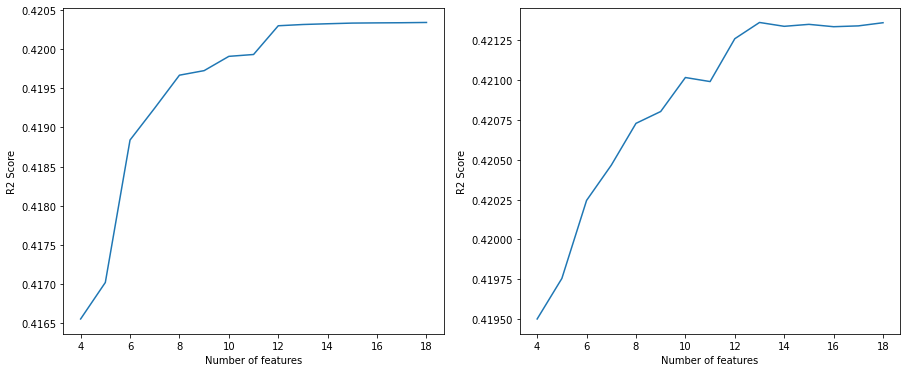

In [276]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.lineplot(x = range(4,19), y = r2_scores_train)

plt.ylabel('R2 Score train')
plt.xlabel('Number of features')

plt.subplot(1,2,2)
sns.lineplot(x = range(4,19), y = r2_scores_test)

plt.ylabel('R2 Score test')
plt.xlabel('Number of features')

plt.show()

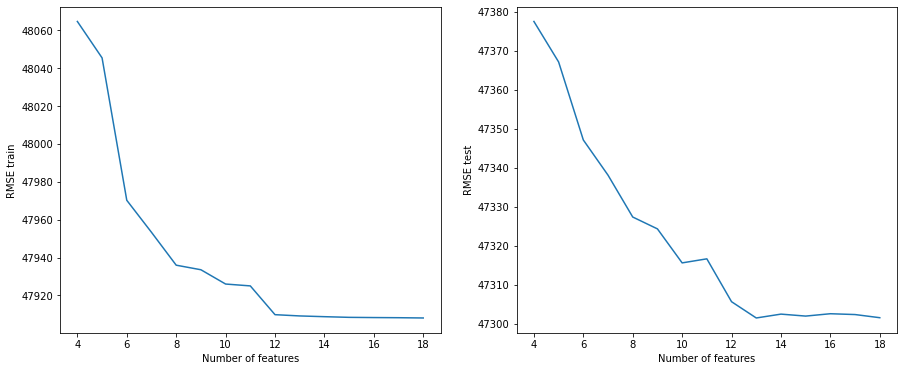

In [277]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)

sns.lineplot(x = range(4,19), y = rmse_values_train)

plt.ylabel('RMSE train')
plt.xlabel('Number of features')

plt.subplot(1,2,2)

sns.lineplot(x = range(4,19), y = rmse_values_test)

plt.ylabel('RMSE test')
plt.xlabel('Number of features')

plt.show()

In [264]:
linreg_rfe = LinearRegression()

rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 13)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(x_train1, y_train1)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = x_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)
feat= signi_feat_rfe

Index(['room', 'layout_type', 'area', 'furnish_type', 'bathroom', 'city', 'parking_spaces', 'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner', 'geyser/solar', 'security_deposit'], dtype='object')


In [265]:
y_train5 = y_train
x_train5 = x_train[feat]
x_test5 = x_test[feat]
y_test5 = y_test

In [266]:
x_train5["security_deposit"] = np.log(x_train5["security_deposit"])
x_train5["area"] = np.log(x_train5["area"])
y_train5 = np.log(y_train5)

In [267]:
linreg  = LinearRegression()
rfe_mod= linreg.fit(x_train5,y_train5)

In [282]:
x_test5["security_deposit"] = np.log(x_test5["security_deposit"])
x_test5["area"] = np.log(x_test5["area"])

rfe_y_pred_train= rfe_mod.predict(x_train5)
rfe_y_pred_test= rfe_mod.predict(x_test5)

print("RMSE of train:\n",mean_squared_error(y_train, np.exp(rfe_y_pred_train), squared=False),"\n")
print("RMSE of test:\n",mean_squared_error(y_test5, np.exp(rfe_y_pred_test), squared=False))

RMSE of train:
 39987.433441173336 

RMSE of test:
 72172.45679471242


# Regularization model

In [284]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 1, max_iter = 500)

# fit the model on train set
rig_model= ridge.fit(x_train1, y_train1)

# score for train set
print('Score of the rigde model on training set:', rig_model.score(x_train1, y_train1))

# print RMSE for train set
# call the function 'get_train_rmse'
rig_y_pred_train = rig_model.predict(x_train1)
rig_y_pred_test = rig_model.predict(x_test1)
print('RMSE on train set:', mean_squared_error(y_train, np.exp(rig_y_pred_train), squared=False))
print('RMSE on test set:', mean_squared_error(y_test1, np.exp(rig_y_pred_test), squared=False))

Score of the rigde model on training set: 0.7884006115835707
RMSE on train set: 33862.14240252886
RMSE on test set: 33182.512115599166


In [293]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01, max_iter = 500)

# fit the model on train set
ls_model= lasso.fit(x_train1, y_train1)

# score for train set
print('Score of the rigde model on training set:', ls_model.score(x_train1, y_train1))

# print RMSE for train set
# call the function 'get_train_rmse'
ls_y_pred_train = ls_model.predict(x_train1)
ls_y_pred_test = ls_model.predict(x_test1)
print('RMSE on train set:', mean_squared_error(y_train, np.exp(ls_y_pred_train), squared=False))
print('RMSE on test set:', mean_squared_error(y_test1, np.exp(ls_y_pred_test), squared=False))

Score of the rigde model on training set: 0.7872909491490261
RMSE on train set: 34058.411902286665
RMSE on test set: 33432.2287120299


In [286]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

# fit the model on train set
en_model= enet.fit(x_train1, y_train1)

# score for train set
print('Score of the rigde model on training set:', en_model.score(x_train1, y_train1))

# print RMSE for train set
# call the function 'get_train_rmse'
en_y_pred_train = en_model.predict(x_train1)
en_y_pred_test = en_model.predict(x_test1)
print('RMSE on train set:', mean_squared_error(y_train, np.exp(en_y_pred_train), squared=False))
print('RMSE on test set:', mean_squared_error(y_test1, np.exp(en_y_pred_test), squared=False))

Score of the rigde model on training set: 0.7836809464576063
RMSE on train set: 38503.408938609224
RMSE on test set: 37778.3593452725


# GridSearchCV

In [295]:
from sklearn.model_selection import GridSearchCV

# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[20, 50, 80, 100, 110, 120]}]
 
# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train_full and y_train_full using fit()
ridge_grid.fit(x_train1, y_train1)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_)

Best parameters for Ridge Regression:  {'alpha': 20}


In [296]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 20, max_iter = 500)

# fit the model on train set
rig_model= ridge.fit(x_train1, y_train1)

# score for train set
print('Score of the rigde model on training set:', rig_model.score(x_train1, y_train1))

# print RMSE for train set
# call the function 'get_train_rmse'
rig_y_pred_train = rig_model.predict(x_train1)
rig_y_pred_test = rig_model.predict(x_test1)
print('RMSE on train set:', mean_squared_error(y_train, np.exp(rig_y_pred_train), squared=False))
print('RMSE on test set:', mean_squared_error(y_test1, np.exp(rig_y_pred_test), squared=False))

Score of the rigde model on training set: 0.7884005850818934
RMSE on train set: 33872.65660341622
RMSE on test set: 33192.91076093616


In [297]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1],
                      'l1_ratio':[0.01, 0.1, 1, 2, 5]}]

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(x_train1, y_train1)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_)

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 1}


In [298]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha = 0.0001, l1_ratio = 1, max_iter = 500)

# fit the model on train set
en_model= enet.fit(x_train1, y_train1)

# score for train set
print('Score of the rigde model on training set:', en_model.score(x_train1, y_train1))

# print RMSE for train set
# call the function 'get_train_rmse'
en_y_pred_train = en_model.predict(x_train1)
en_y_pred_test = en_model.predict(x_test1)
print('RMSE on train set:', mean_squared_error(y_train, np.exp(en_y_pred_train), squared=False))
print('RMSE on test set:', mean_squared_error(y_test1, np.exp(en_y_pred_test), squared=False))

Score of the rigde model on training set: 0.7884002172282658
RMSE on train set: 33862.859625685436
RMSE on test set: 33183.26418902419


# Decision Tree

In [299]:
import sklearn.tree as tree
from sklearn.tree import DecisionTreeRegressor

import sklearn.metrics as metrics
from sklearn.metrics import classification_report

In [348]:
DTR = DecisionTreeRegressor(random_state=1, max_depth=5)
DTR_model = DTR.fit(x_train,y_train)
pred = DTR_model.predict(x_train)
DTR_model.score(x_train,y_train) , DTR_model.score(x_test,y_test)

(0.8224315455759077, 0.813327249763339)

In [349]:
# print RMSE for train set
# call the function 'get_train_rmse'
dt_y_pred_train = DTR_model.predict(x_train)
dt_y_pred_test = DTR_model.predict(x_test)
print('RMSE on train set:', mean_squared_error(y_train,dt_y_pred_train, squared=False))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', mean_squared_error(y_test,dt_y_pred_test, squared=False))

RMSE on train set: 26515.922901999886
RMSE on test set: 26866.532010343493


In [326]:
tuned_paramaters = [{'criterion': ["squared_error", "friedman_mse"], 
                     'max_depth': [5,6,7],
                     'min_samples_split': [2,5,8],
                     'min_samples_leaf': [1,5,9]}]

tree_grid = GridSearchCV(estimator = DTR, 
                         param_grid = tuned_paramaters)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(x_train,y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 2} 



In [327]:
# instantiate the 'DecisionTreeRegressor'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model = DecisionTreeRegressor(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  random_state = 1)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(x_train,y_train)
dt_model.score( x_train,y_train) , dt_model.score(x_test,y_test)

(0.822352690638516, 0.8127127004282497)

In [328]:
# print RMSE for train set
# call the function 'get_train_rmse'
dt_y_pred_train2 = dt_model.predict(x_train)
dt_y_pred_test2 = dt_model.predict(x_test)
print('RMSE on train set:', mean_squared_error(y_train,dt_y_pred_train2, squared=False))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', mean_squared_error(y_test,dt_y_pred_test2, squared=False))

RMSE on train set: 26521.80986926737
RMSE on test set: 26910.719613482306


In [370]:
tuned_paramaters = [{'criterion': ["squared_error", "friedman_mse"], 
                     'max_depth': [5,6,7],
                     'min_samples_split': [2,5,8],
                     'min_samples_leaf': [1,5,9]}]

tree_grid = GridSearchCV(estimator = DTR, 
                         param_grid = tuned_paramaters)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(x_train1,y_train1)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'squared_error', 'max_depth': 7, 'min_samples_leaf': 9, 'min_samples_split': 2} 



In [379]:
DTR2 = DecisionTreeRegressor(random_state=1,criterion= 'squared_error', 
                            max_depth = 6, min_samples_leaf = 9, min_samples_split =2)
DTR_model2 = DTR2.fit(x_train1,y_train1)

DTR_model2.score(x_train1,y_train1)

0.8033988011169595

In [380]:
dt_y_pred_train3 = DTR_model2.predict(x_train1)
dt_y_pred_test3 = DTR_model2.predict(x_test1)

print('RMSE on train set:', mean_squared_error(y_train, np.exp(dt_y_pred_train3), squared=False))
print('RMSE on test set:', mean_squared_error(y_test1, np.exp(dt_y_pred_test3), squared=False))

RMSE on train set: 26941.210204634706
RMSE on test set: 27079.255617543688


# Random Forest Model

In [353]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(random_state = 1)
RFR_model = RFR.fit(x_train,y_train)
RFR_model.score(x_train,y_train) , RFR_model.score(x_test,y_test)

(0.9720142200249431, 0.8023049027274063)

In [354]:
# print RMSE for train set
# call the function 'get_train_rmse'
rfr_y_pred_train2 = RFR_model.predict(x_train)
rfr_y_pred_test2 = RFR_model.predict(x_test)
print('RMSE on train set:', mean_squared_error(y_train,rfr_y_pred_train2, squared=False))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', mean_squared_error(y_test,rfr_y_pred_test2, squared=False))

RMSE on train set: 10526.707315824053
RMSE on test set: 27648.34226139174


In [356]:
tuned_paramaters = [{'criterion': ["squared_error", "friedman_mse"], 
                     'max_depth': range(5,8),
                     'n_estimators' : range(100,110,2)}]

tree_grid = GridSearchCV(estimator = RFR, 
                         param_grid = tuned_paramaters)

# fit the model on X_train and y_train using fit()
RFR_grid_model = tree_grid.fit(x_train,y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', RFR_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'squared_error', 'max_depth': 6, 'n_estimators': 100} 



In [363]:
RFR1 = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=6, random_state=1)
RFR_model1 = RFR1.fit(x_train,y_train)
RFR_model1.score(x_train,y_train) , RFR_model1.score(x_test,y_test)

(0.8330131147227409, 0.816593249932867)

In [364]:
# print RMSE for train set
# call the function 'get_train_rmse'
rfr_y_pred_train3 = RFR_model1.predict(x_train)
rfr_y_pred_test3 = RFR_model1.predict(x_test)
print('RMSE on train set:', mean_squared_error(y_train,rfr_y_pred_train3, squared=False))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', mean_squared_error(y_test,rfr_y_pred_test3, squared=False))

RMSE on train set: 25713.726622848488
RMSE on test set: 26630.46838845782


In [416]:
RFR1 = RandomForestRegressor(n_estimators=110, criterion='squared_error', max_depth=6, random_state=1)
RFR_model2 = RFR1.fit(x_train1,y_train1)
RFR_model2.score(x_train1,y_train1)

0.8055390598449493

In [417]:
r_y_pred_train3 = RFR_model2.predict(x_train1)
r_y_pred_test3 = RFR_model2.predict(x_test1)

In [418]:
print('RMSE on train set:', mean_squared_error(y_train, np.exp(r_y_pred_train3), squared=False))
print('RMSE on test set:', mean_squared_error(y_test1, np.exp(r_y_pred_test3), squared=False))

RMSE on train set: 26833.495028239588
RMSE on test set: 26779.115950352294


In [698]:
from sklearn.preprocessing import StandardScaler

In [748]:
y_train6 = y_train1
x_train6 = x_train1
x_test6 = x_test1
y_test6 = y_test1

In [749]:
ss = StandardScaler()
x = pd.DataFrame(x_train6.neighbourhood)
xt = pd.DataFrame(x_test6.neighbourhood)
x_train6.neighbourhood = ss.fit_transform(x)
x_test6.neighbourhood = ss.fit_transform(xt)

In [727]:
RFR_model3 = rf_sd.fit(x_train6,y_train6)
RFR_model3.score(x_train6,y_train6)

0.8073415246240673

In [728]:
r_y_pred_train4 = RFR_model3.predict(x_train6)
r_y_pred_test4 = RFR_model3.predict(x_test6)

In [729]:
print('RMSE on train set:', mean_squared_error(y_train, np.exp(r_y_pred_train4), squared=False))
print('RMSE on test set:', mean_squared_error(y_test, np.exp(r_y_pred_test4), squared=False))

RMSE on train set: 26472.169997227073
RMSE on test set: 26763.931681480837


# AdaBoost Regressor Model

In [384]:
from sklearn.ensemble import AdaBoostRegressor

adaboost_regr = AdaBoostRegressor(random_state = 1)
adaboost_model = adaboost_regr.fit(x_train,y_train)
adaboost_model.score(x_train,y_train), adaboost_model.score(x_test,y_test)

(0.7066873721347343, 0.6994033309983367)

In [385]:
# print RMSE for train set
# call the function 'get_train_rmse'
ad_y_pred_train = adaboost_model.predict(x_train)
ad_y_pred_test = adaboost_model.predict(x_test)
print('RMSE on train set:', mean_squared_error(y_train,ad_y_pred_train, squared=False))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', mean_squared_error(y_test,ad_y_pred_test, squared=False))

RMSE on train set: 34079.186619210566
RMSE on test set: 34092.843843835966


# deploy the best model


In [388]:
# import pickle to deploy the best model
import pickle

In [389]:
#Save the model with Pickle
pickle.dump(RFR_model1, open('RFR_model1.pkl', 'wb'))  # Encoding requiered only. RMSE train(25713.7266) & test(26630.4683)
pickle.dump(RFR_model2, open('RFR_model2.pkl', 'wb')) #Encoding with tranformation requiered. (26835.3395)  &   (26783.8224)

In [532]:
test_df = pd.read_csv("test_csv2022 (1).csv")

In [534]:
house_rent= test_df.copy()

In [535]:
test_df.drop(['Property_ID','locality'],axis=1,inplace=True)

In [536]:
test_df['property_type']=le.fit_transform(test_df['property_type'])
test_df['city']=le.fit_transform(test_df['city'])

In [537]:
test_df.furnish_type.replace(['Furnished', 'Unfurnished', 'Semi-Furnished'],[2,0,1],inplace=True)

In [538]:
test_df.layout_type= pd.get_dummies(test_df.layout_type, drop_first=True)

In [750]:
test_df2 = test_df

In [751]:
test_df2["security_deposit"] = np.log(test_df2["security_deposit"])
test_df2["area"] = np.log(test_df2["area"])

In [752]:
ss_t = pd.DataFrame(test_df2.neighbourhood)

test_df2.neighbourhood = ss.fit_transform(ss_t)

# model test

In [497]:
x_test.columns

Index(['room', 'layout_type', 'property_type', 'area', 'furnish_type', 'bathroom', 'city', 'parking_spaces', 'floor', 'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner', 'geyser/solar', 'security_deposit', 'CCTV/security', 'lift', 'neighbourhood'], dtype='object')

In [694]:
#sd = x_train1[["security_deposit","area","neighbourhood","furnish_type","room"]]
sd = x_train1[['room', 'area', 'furnish_type', 'city', 'parking_spaces', 'floor', 
               'power_backup', 'air_conditioner', 'security_deposit', 'CCTV/security',
               'lift', 'neighbourhood']]

In [486]:
sd = sm.add_constant(sd)

In [487]:
sd_model= sm.OLS(y_train1,sd).fit()
sd_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                 1.118e+05
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:45:38   Log-Likelihood:                -56229.
No. Observations:               91584   AIC:                         1.125e+05
Df Residuals:                   91580   BIC:                         1.125e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5685      0.022     25.306      0.000       0.524       0.613
security_deposit     0.7823      0.001    573.040      0.000       0.780       0.785
area                 0.0435      0.002     17.919      0.000       0.039       0.048
neighbourhood    -9.349e-06   1.27e-06     -7.340      0.000   -1.18e-05   -6.85e-06
==============================================================================
Omnibus:                     4090.601   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3848.722
Skew:                           0.451   Prob(JB):                         0.00
Kurtosis:                       2.558   Cond. No.                     3.57e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [695]:
#sd_test = x_test1[["security_deposit","area","neighbourhood","furnish_type","room"]]
sd_test = x_test1[['room', 'area', 'furnish_type', 'city', 'parking_spaces', 'floor', 
               'power_backup', 'air_conditioner', 'security_deposit', 'CCTV/security',
               'lift', 'neighbourhood']]
#sd_test = sm.add_constant(sd_test)

In [616]:
dt = DecisionTreeRegressor(random_state=1,max_depth=6, criterion="friedman_mse")
sd_dt_model = dt.fit(sd,y_train1)

In [617]:
mean_squared_error(y_test,np.exp(dt.predict(sd_test)),squared=False)

27085.236269053214

In [696]:
rf_sd = RandomForestRegressor(n_estimators=140,max_depth=7, criterion='squared_error',random_state=1)
sd_rf_model = rf_sd.fit(sd,y_train1)

In [697]:
mean_squared_error(y_test,np.exp(sd_rf_model.predict(sd_test)),squared=False)

26764.56812475494

In [672]:
test = test_df2[['room', 'area', 'furnish_type', 'city', 'parking_spaces', 'floor', 
               'power_backup', 'air_conditioner', 'security_deposit', 'CCTV/security',
               'lift', 'neighbourhood']]
pr = np.exp(sd_rf_model.predict(test))

In [ ]:
pr = np.exp(RFR_model3.predict(test_df2))

In [757]:
pr

array([26300.83  ,  3798.1252,  8559.754 , ..., 34868.7   , 20824.27  ,
       19431.281 ], dtype=float32)

In [758]:
price2 = pd.DataFrame(pr, columns = ["price"])

In [759]:
rent_price = pd.concat([house_rent,price2],axis=1)
rent_price= rent_price[["Property_ID","price"]]
rent_price = rent_price.reset_index(drop=True)
rent_price

,Property_ID,price
0,27345,26300.830078
1,111493,3798.125244
2,176972,8559.753906
3,66650,22821.265625
4,72437,5572.812500
...,...,...
20198,137607,34068.699219
20199,43656,16819.179688
20200,14331,34868.699219
20201,80835,20824.269531


In [760]:
rent_price.to_csv("new_rent_price.csv")

In [764]:
#import xgboost as xgb
#from xgboost.sklearn import XGBRegressor
#import datetime
#from sklearn.model_selection import GridSearchCV
xgb1 = XGBRegressor()

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.025,.03,0.035], #so called `eta` value
              'max_depth': [5],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid3 = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = 5)

xgb_model  = xgb_grid3.fit(x_train6,y_train6)

print(xgb_model.best_score_)
print(xgb_model.best_params_)

[21:39:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

0.8070891737098048
{'colsample_bytree': 0.7, 'learning_rate': 0.025, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [765]:
x_y_pred_train4 = xgb_model.predict(x_train6)
x_y_pred_test4 = xgb_model.predict(x_test6)
print('RMSE on train set:', mean_squared_error(y_train, np.exp(x_y_pred_train4), squared=False))
print('RMSE on test set:', mean_squared_error(y_test, np.exp(x_y_pred_test4), squared=False))

RMSE on train set: 26373.548387760486
RMSE on test set: 26814.8148483157


In [763]:
pr = np.exp(xgb_model.predict(test_df2))

In [776]:
xgb2 = XGBRegressor(colsample_bytree = 0.7,  learning_rate = 0.0125,  max_depth = 7,  min_child_weight = 4,  
                    n_estimators = 500,  nthread = 4)
xgb_model2  = xgb2.fit(x_train6,y_train6)

In [777]:
x_y_pred_train4 = xgb_model2.predict(x_train6)
x_y_pred_test4 = xgb_model2.predict(x_test6)
print('RMSE on train set:', mean_squared_error(y_train, np.exp(x_y_pred_train4), squared=False))
print('RMSE on test set:', mean_squared_error(y_test, np.exp(x_y_pred_test4), squared=False))

RMSE on train set: 26782.64513090219
RMSE on test set: 27497.984088604775
